In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [7]:
! head ../data/swbook1_3e/textfiles/CRIME1.DES

In [12]:
data_path = "../data/swbook1_3e/textfiles/"

header_crime = ['narr86', 'nfarr86', 'nparr86', 'pcnv', 'avgsen', 'tottime', 'ptime86', 'qemp86',  
'inc86', 'durat', 'black', 'hispan', 'born60', 'pcnvsq', 'pt86sq', 'inc86sq']

df_crime1 = pd.read_table(data_path + "/CRIME1.raw", sep="\s+", header=None, names=header_crime)

df_crime1.head()


,narr86,nfarr86,nparr86,pcnv,avgsen,tottime,ptime86,qemp86,inc86,durat,black,hispan,born60,pcnvsq,pt86sq,inc86sq
0,0,0,0,0.38,17.6,35.2,12,0.0,0.0,0.0,0,0,1,0.1444,144,0.00000
1,2,2,0,0.44,0.0,0.0,0,1.0,0.8,0.0,0,1,0,0.1936,0,0.64000
2,1,1,0,0.33,22.8,22.8,0,0.0,0.0,11.0,1,0,1,0.1089,0,0.00000
3,2,2,1,0.25,0.0,0.0,5,2.0,8.8,0.0,0,1,1,0.0625,25,77.44000
4,1,1,0,0.00,0.0,0.0,0,2.0,8.1,1.0,0,0,0,0.0000,0,65.61001


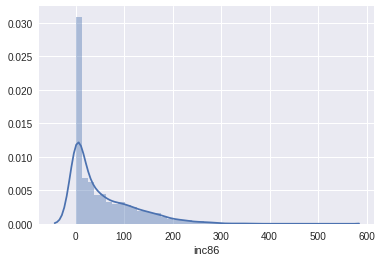

In [21]:
sns.distplot(df_crime1.inc86)

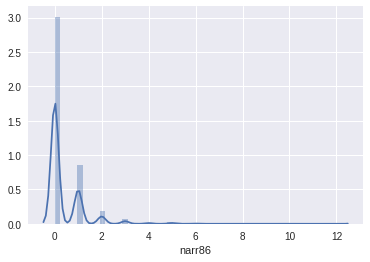

In [22]:
sns.distplot(df_crime1.narr86)

In [ ]:
! more ../data/swbook1_3e/textfiles/WAGE1.DES

WAGE1.DES

wage      educ      exper     tenure    nonwhite  female    married   numdep   
smsa      northcen  south     west      construc  ndurman   trcommpu  trade    
services  profserv  profocc   clerocc   servocc   lwage     expersq   tenursq  

  Obs:   526

  1. wage                     average hourly earnings
  2. educ                     years of education
  3. exper                    years potential experience
  4. tenure                   years with current employer
  5. nonwhite                 =1 if nonwhite
  6. female                   =1 if female
  7. married                  =1 if married
  8. numdep                   number of dependents
  9. smsa                     =1 if live in SMSA
 10. northcen                 =1 if live in north central U.S
 11. south                    =1 if live in southern region
 12. west                     =1 if live in western region
 13. construc                 =1 if work in construc. indus.
 14. ndurman                  =1 if in non

In [35]:
header_wage1 = ['wage','educ','exper','tenure','nonwhite','female','married','numdep',
                'smsa','northcen','south','west','construc','ndurman','trcommpu','trade',
                'services','profserv','profocc','clerocc','servocc','lwage','expersq','tenursq']
                
df_wage1 = pd.read_table(data_path + "WAGE1.raw", sep="\s+", header=None, names=header_wage1)

df_wage1.drop("lwage", axis=1, inplace=True)
df_wage1.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,ndurman,trcommpu,trade,services,profserv,profocc,clerocc,servocc,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,0,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,0,1,0,0,0,1,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,0,1,0,0,0,0,0,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,49,4


In [36]:
y = df_wage1.iloc[:, 0].values
X = df_wage1.iloc[:, 1:].values

beta = (np.linalg.inv(X.T @ X)) @ X.T @ y
beta

array([  3.68393483e-01,   1.71170480e-01,   1.56616775e-01,
        -6.44593718e-02,  -1.58845500e+00,   9.29401640e-02,
         2.56105233e-02,   7.56299679e-01,  -5.01785410e-01,
        -3.71097013e-01,   5.05104039e-01,  -3.62337724e-01,
        -7.30322859e-01,  -9.81219843e-01,  -1.91757525e+00,
        -1.67791341e+00,  -8.66763725e-01,   1.80000628e+00,
         2.93329339e-01,   2.35345521e-02,  -3.47073052e-03,
        -1.69033036e-03])

In [39]:
df_wage1.columns[beta.argsort()]

Index(['trcommpu', 'trade', 'nonwhite', 'ndurman', 'services', 'construc',
       'smsa', 'northcen', 'west', 'tenure', 'servocc', 'expersq', 'clerocc',
       'married', 'female', 'exper', 'educ', 'profocc', 'wage', 'south',
       'numdep', 'profserv'],
      dtype='object')